In [4]:
import pandas as pd

In [29]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
%matplotlib inline

In [8]:
# Preprocessing
from sklearn.preprocessing import OneHotEncoder

In [9]:
# machine learning
from sklearn import  metrics
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Import and Observe Data

In [11]:
df = pd.read_csv(r"C:\Users\Anurag Yadav\Downloads\turnover\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [12]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [13]:
df.shape

(1470, 35)

In [14]:
# drop the unnecessary columns
df.drop(['EmployeeNumber','Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [15]:
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == "Yes" else 0 )
df['OverTime'] = df['OverTime'].apply(lambda x:1 if x =="Yes" else 0 )

In [24]:
attrition = df[df['Attrition'] == 1]
no_attrition = df[df['Attrition']==0]

### Visualization of Categorical Features 

In [33]:
def categorical_column_viz(col_name):
    
    f,ax = plt.subplots(1,2, figsize=(10,6))
  
    # Count Plot
    df[col_name].value_counts().plot.bar(cmap='Set2',ax=ax[0])
    ax[1].set_title(f'Number of Employee by {col_name}')
    ax[1].set_ylabel('Count')
    ax[1].set_xlabel(f'{col_name}')
    
    # Attrition Count per factors
    sns.countplot(x=col_name, hue='Attrition',data=df, ax=ax[1], palette='Set2')
    ax[1].set_title(f'Attrition by {col_name}')
    ax[1].set_xlabel(f'{col_name}')
    ax[1].set_ylabel('Count')

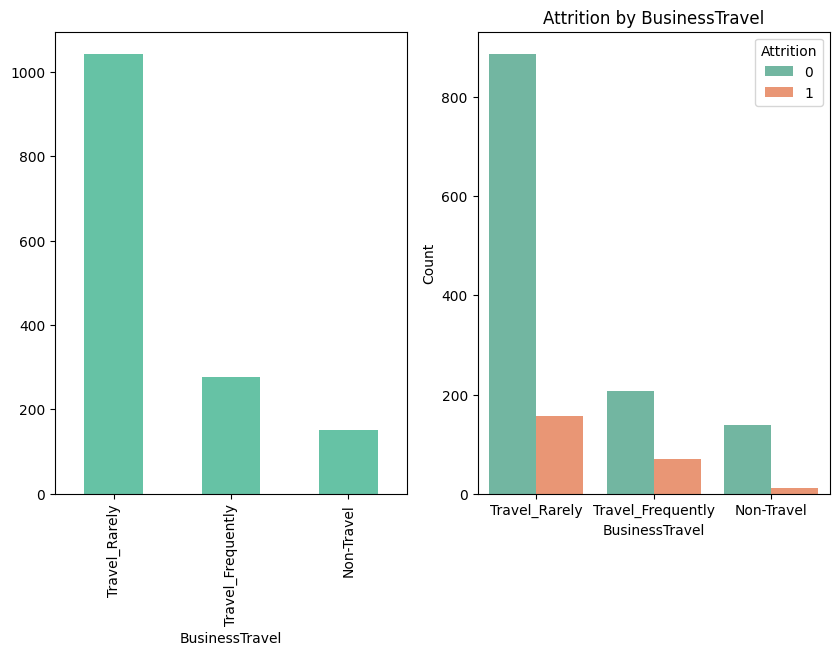

In [34]:
categorical_column_viz('BusinessTravel')

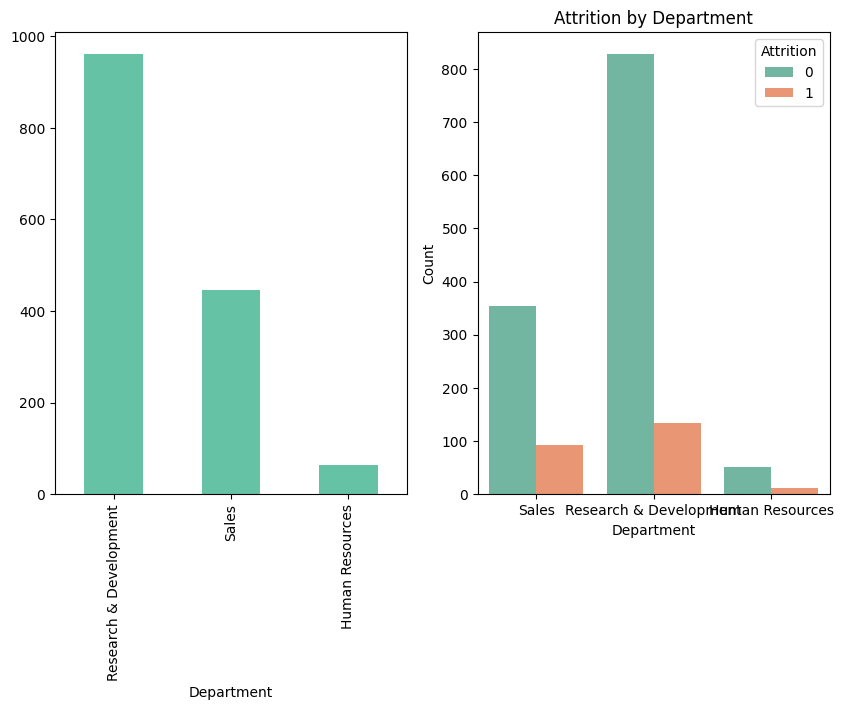

In [35]:
categorical_column_viz('Department')

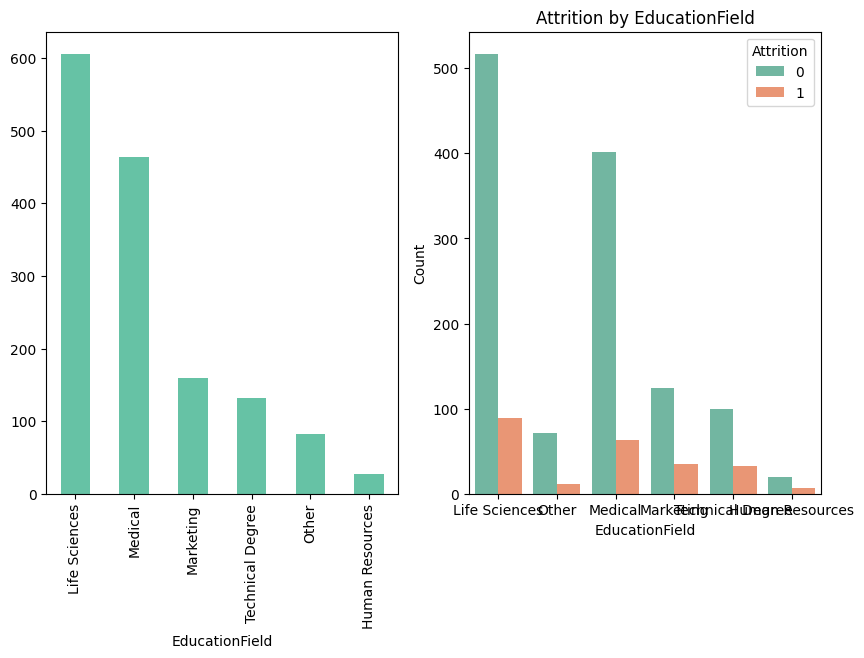

In [36]:
categorical_column_viz('EducationField')

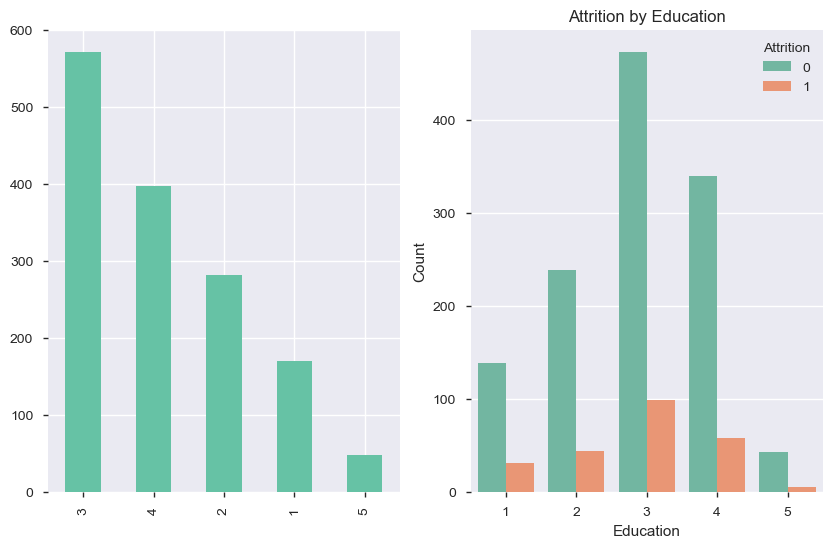

In [17]:
categorical_column_viz('Education')

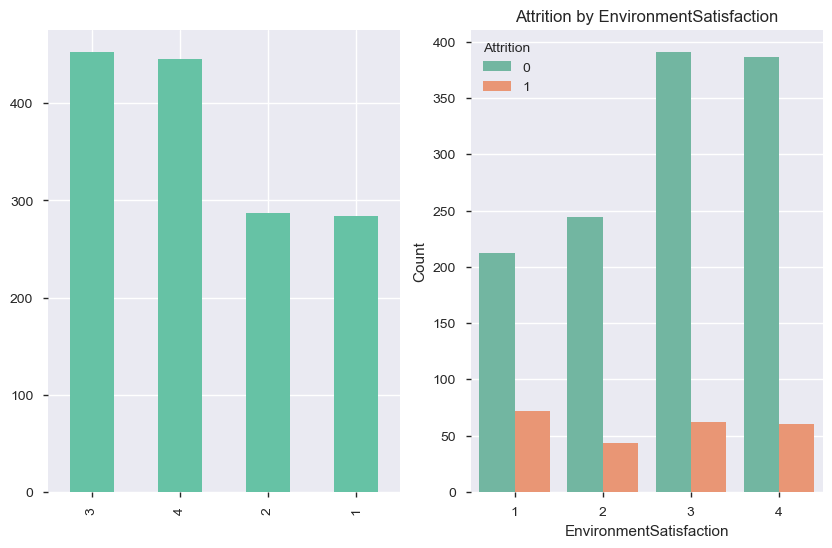

In [18]:
categorical_column_viz('EnvironmentSatisfaction')

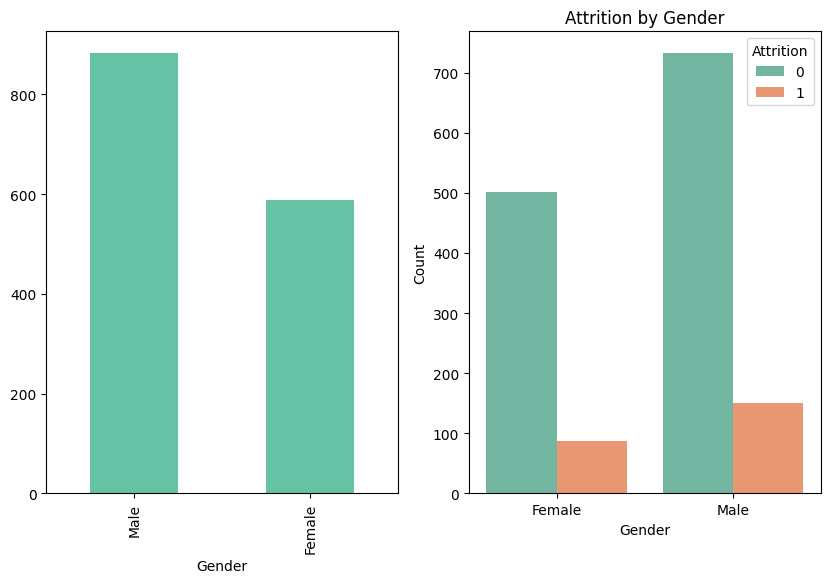

In [37]:
categorical_column_viz('Gender')

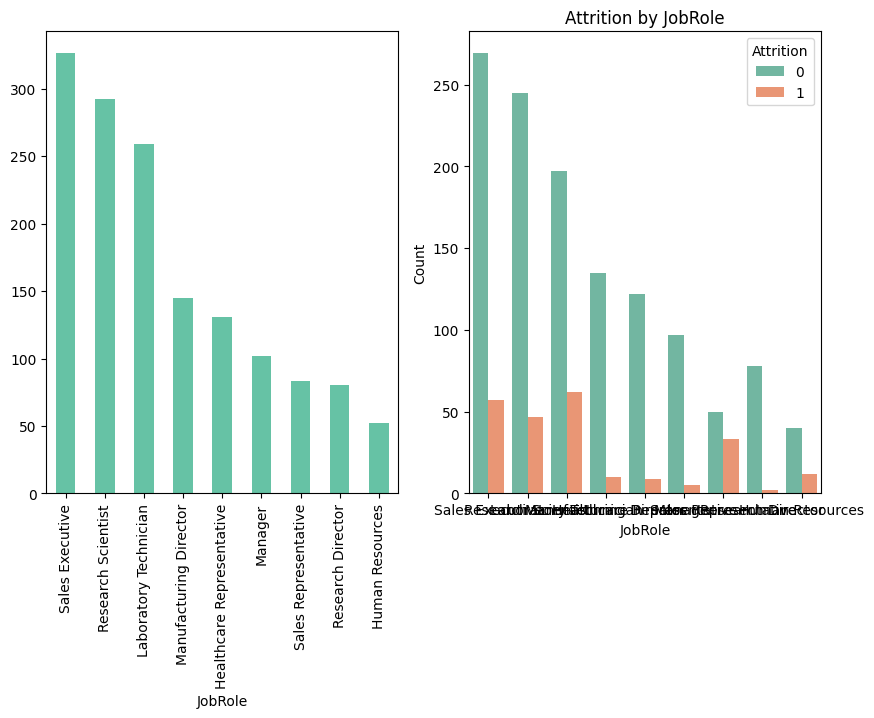

In [38]:
categorical_column_viz('JobRole')

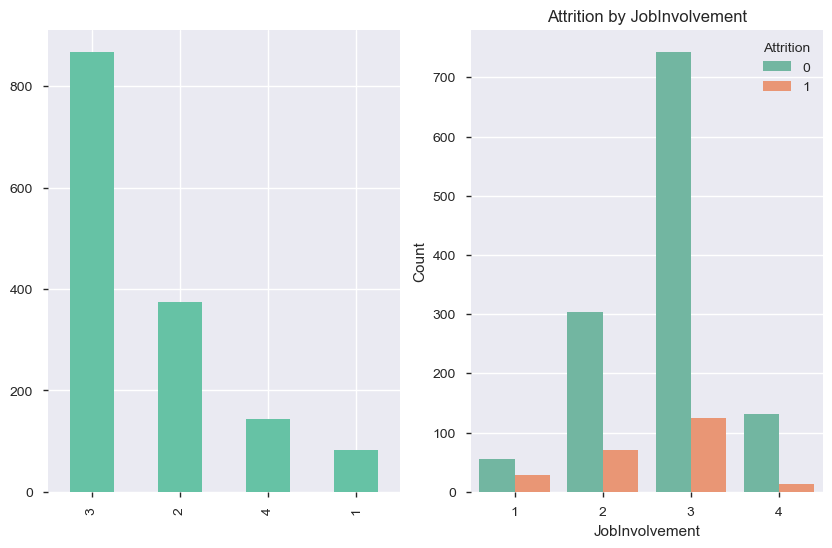

In [21]:
categorical_column_viz('JobInvolvement')

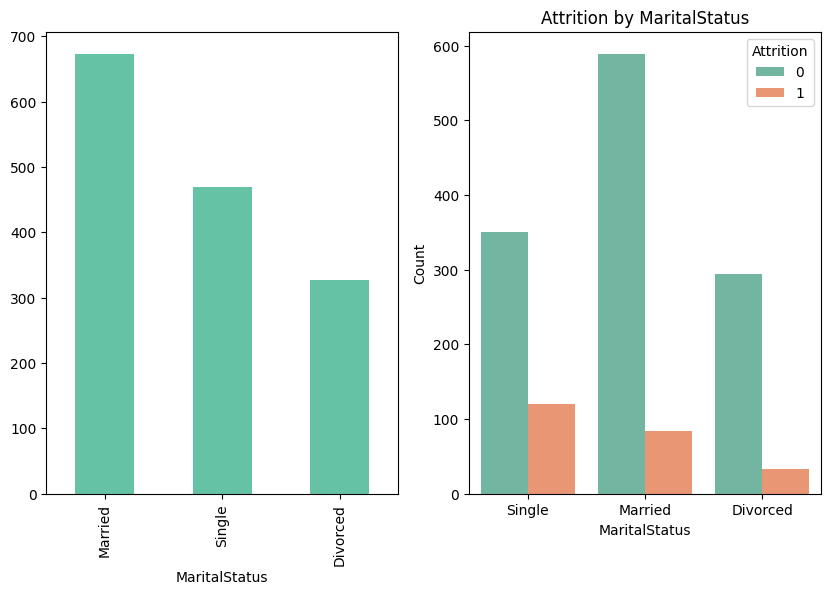

In [39]:
categorical_column_viz('MaritalStatus')

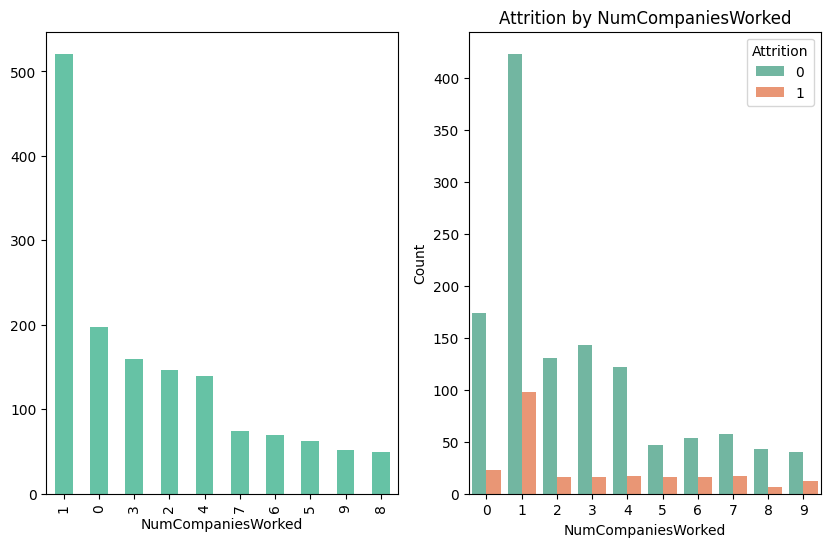

In [40]:
categorical_column_viz('NumCompaniesWorked')

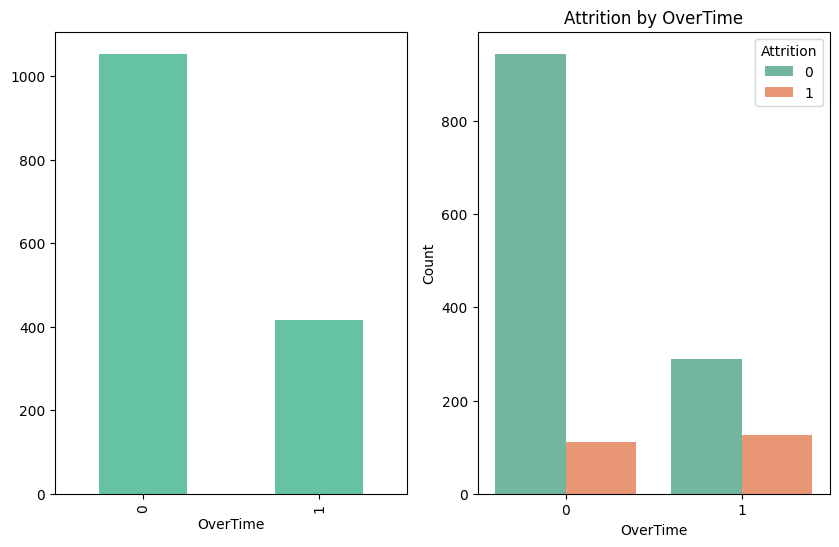

In [41]:
categorical_column_viz('OverTime')

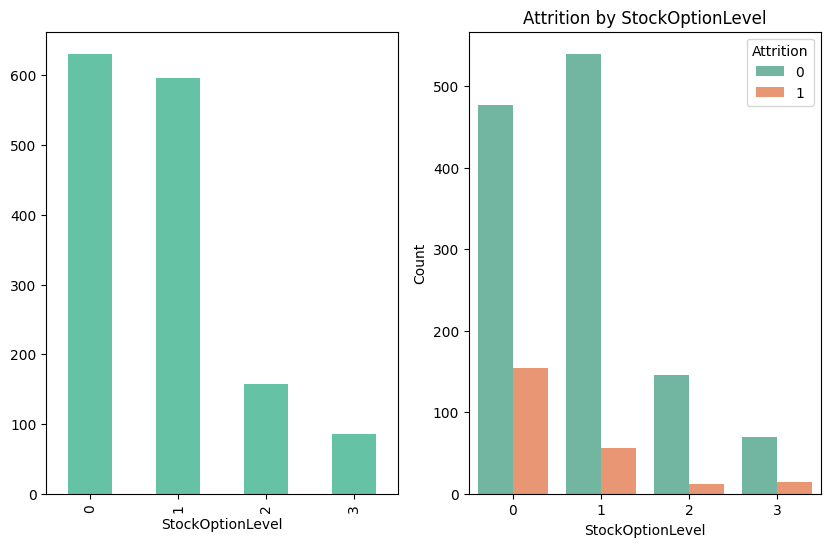

In [42]:
categorical_column_viz('StockOptionLevel')

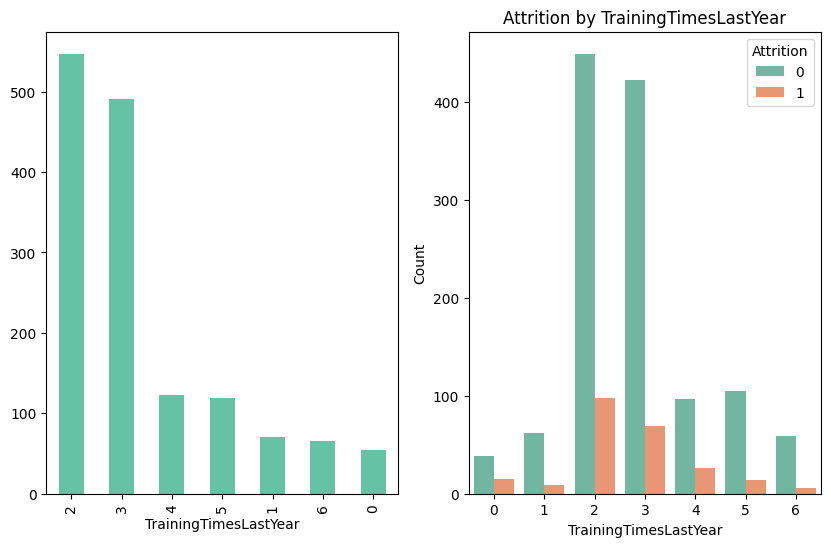

In [43]:
categorical_column_viz('TrainingTimesLastYear')

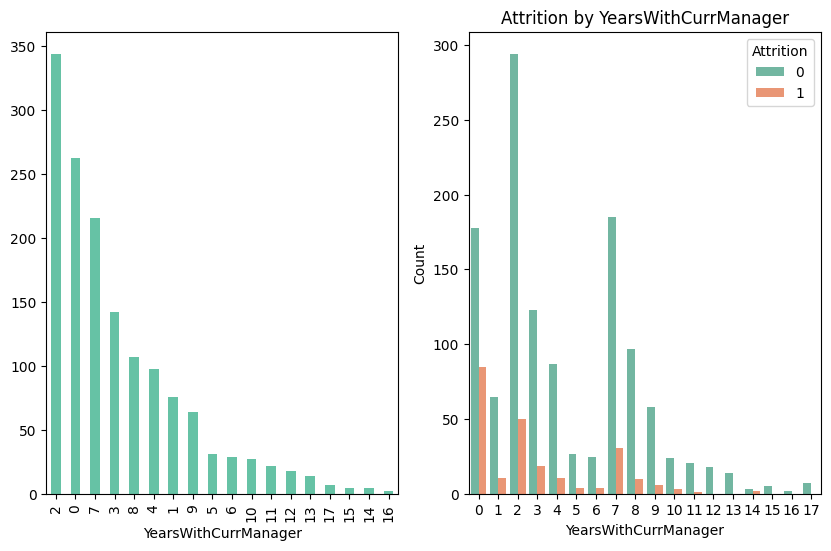

In [44]:
categorical_column_viz('YearsWithCurrManager')

### Visualization of Numerical Features 

In [45]:
def numerical_column_viz(col_name):
    f,ax = plt.subplots(1,2, figsize=(18,6))
    sns.kdeplot(attrition[col_name], label='Employee who left',ax=ax[0], shade=True, color='palegreen')
    sns.kdeplot(no_attrition[col_name], label='Employee who stayed', ax=ax[0], shade=True, color='salmon')
    
    sns.boxplot(y=col_name, x='Attrition',data=df, palette='Set3', ax=ax[1])

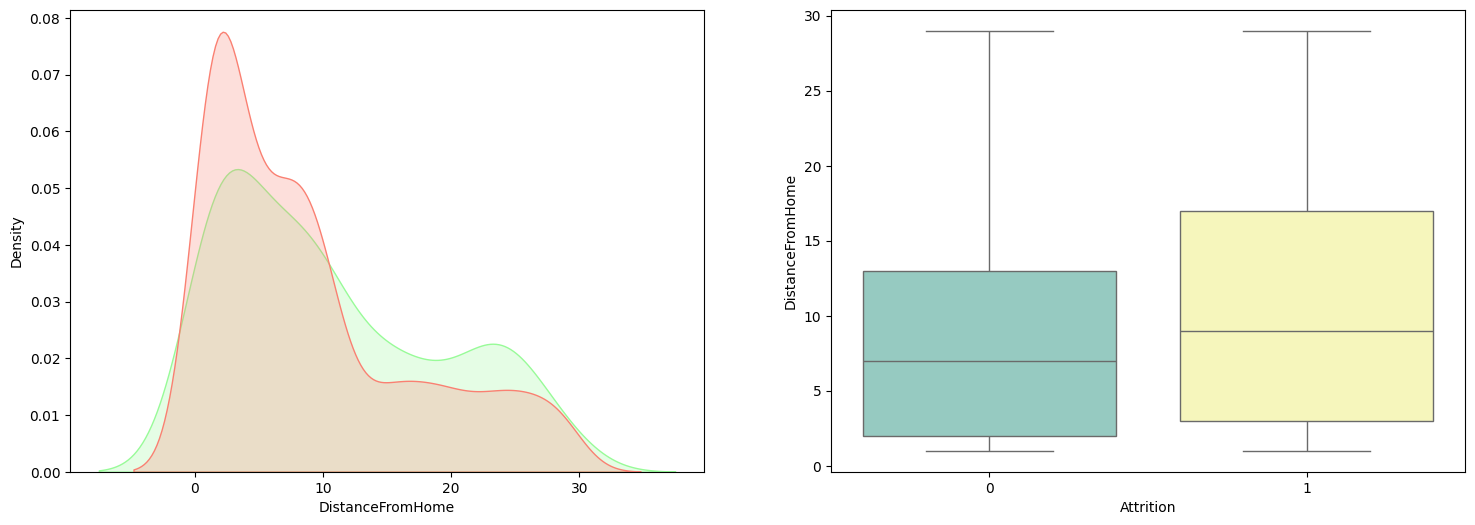

In [46]:
numerical_column_viz("DistanceFromHome")

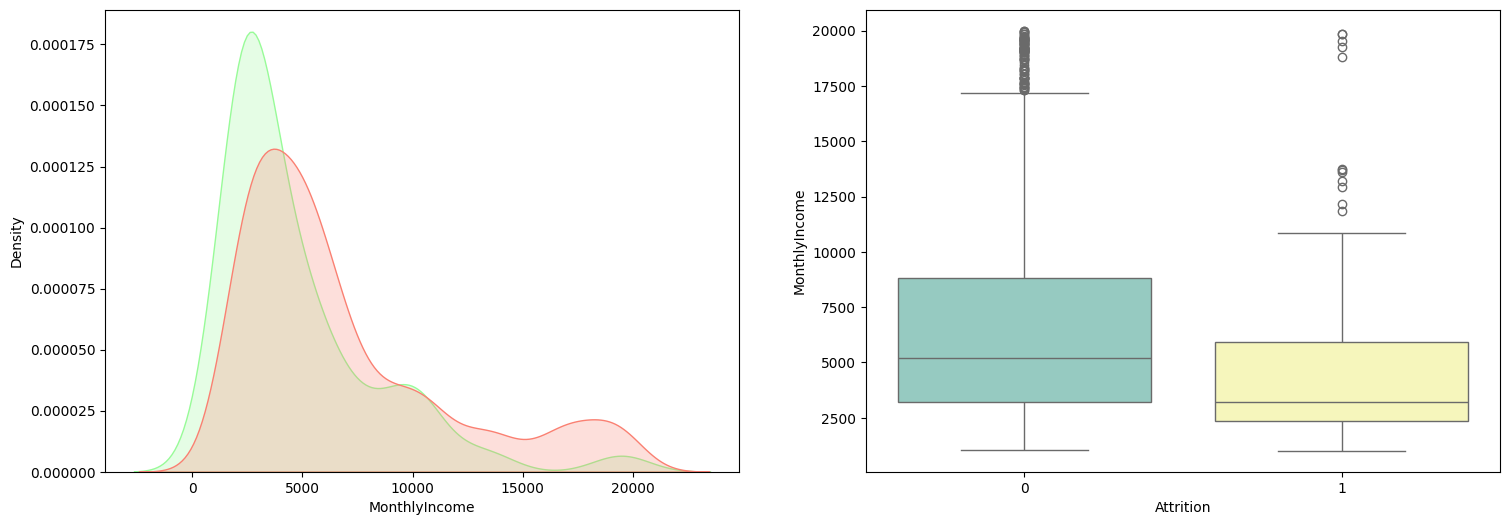

In [47]:
numerical_column_viz("MonthlyIncome")

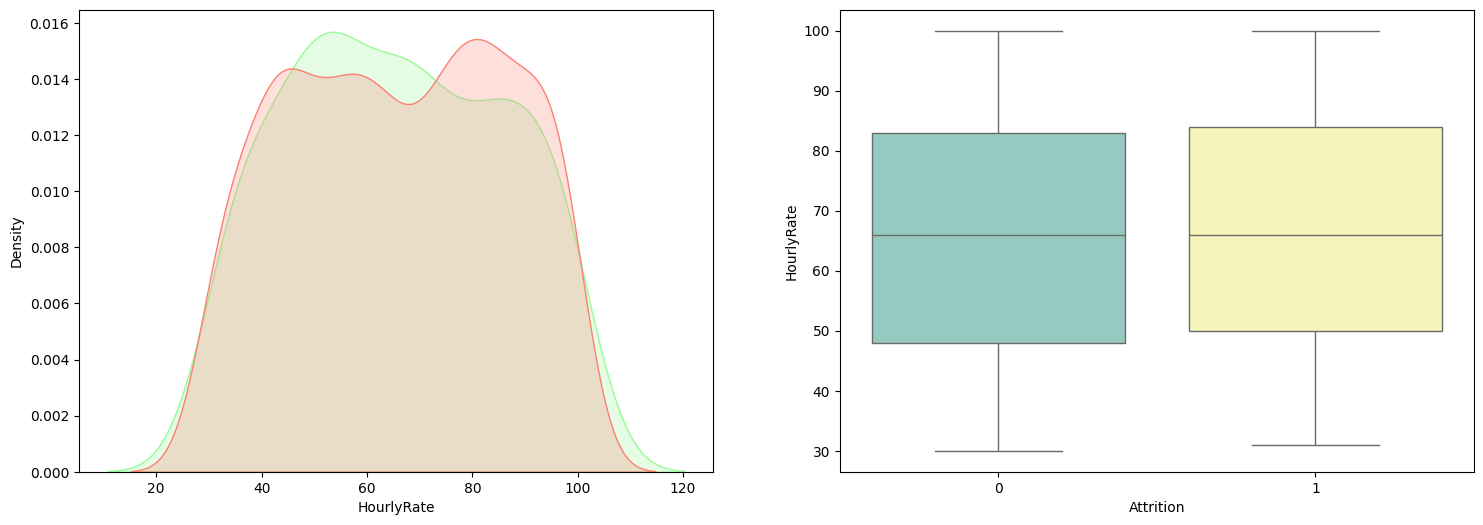

In [48]:
numerical_column_viz("HourlyRate")

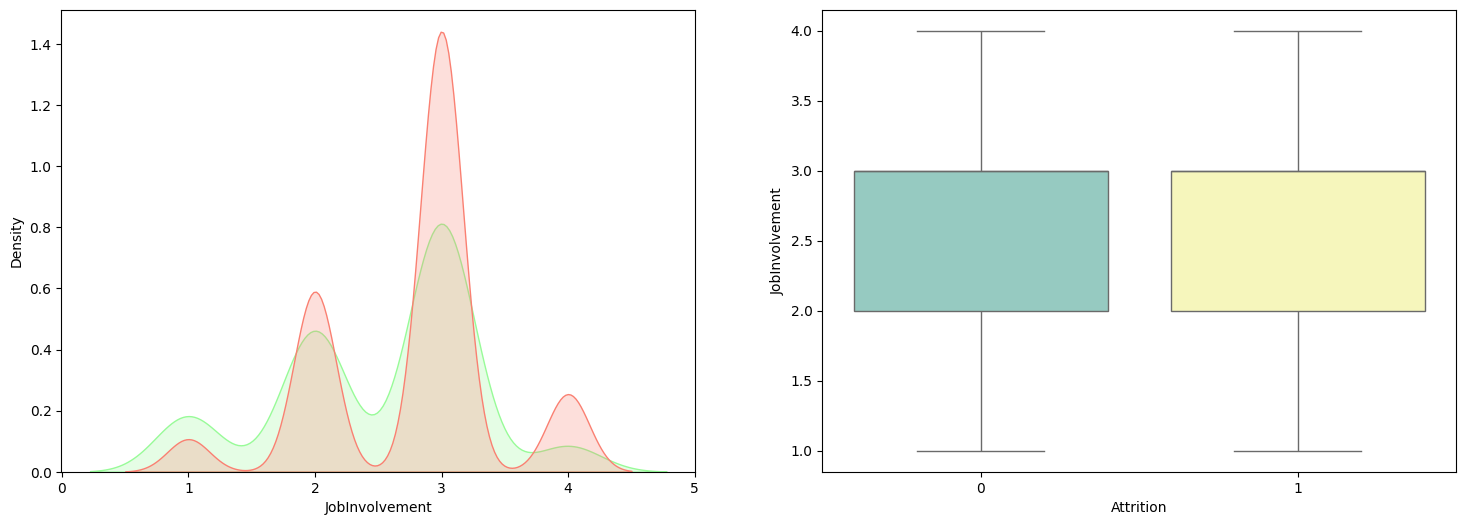

In [49]:
numerical_column_viz("JobInvolvement")

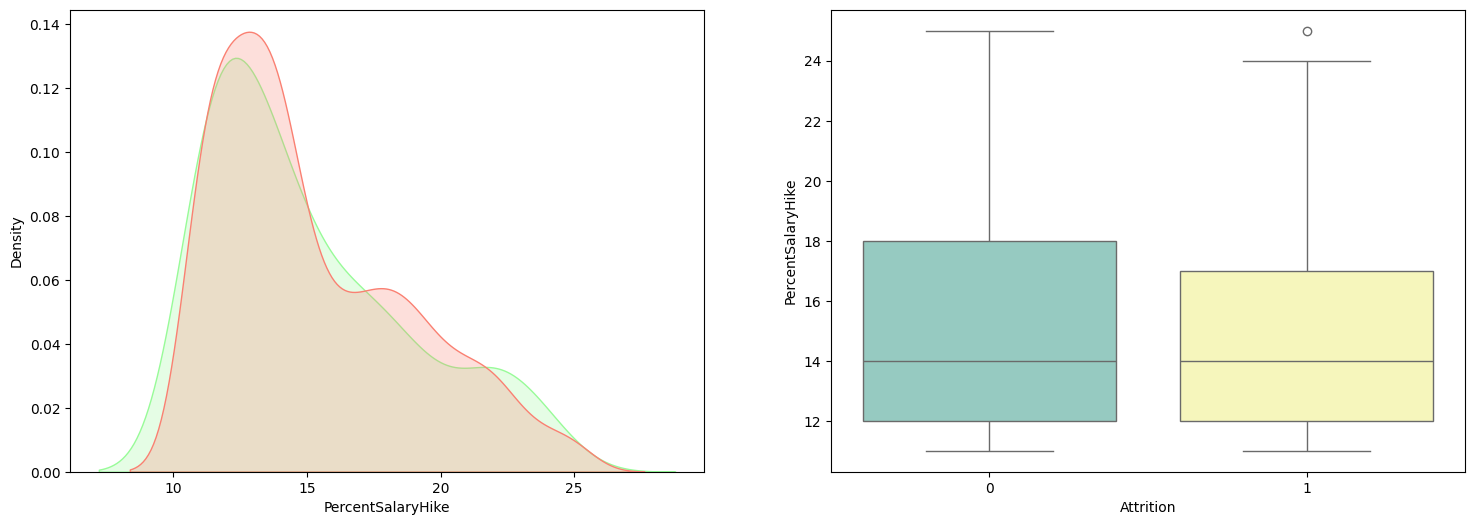

In [50]:
numerical_column_viz("PercentSalaryHike")

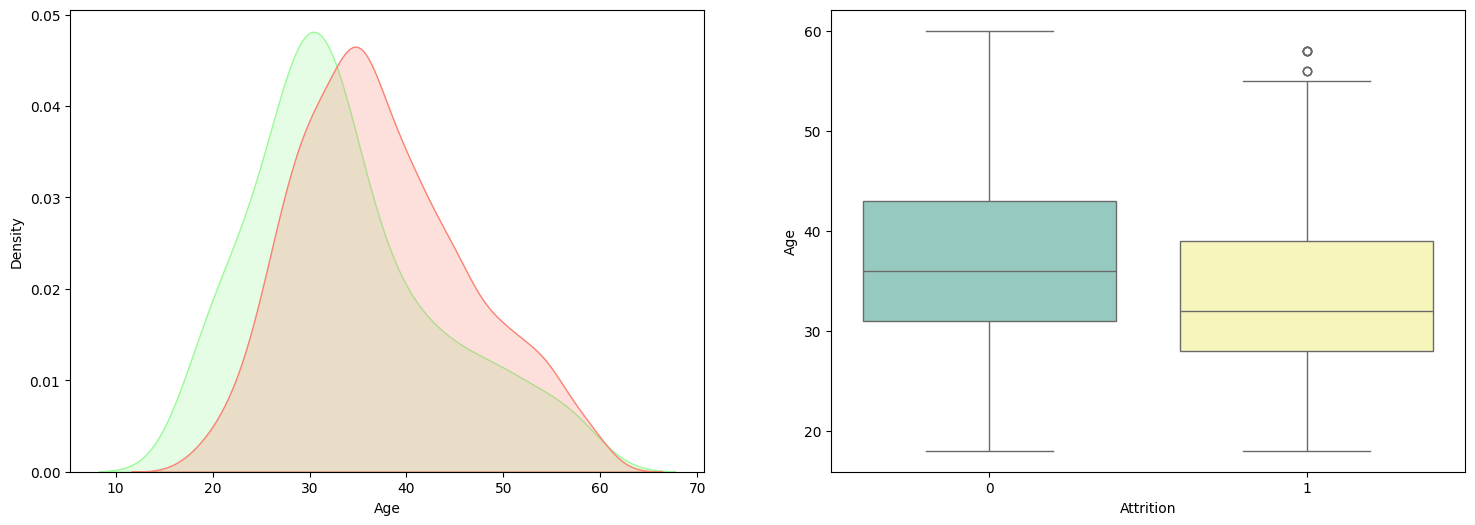

In [51]:
numerical_column_viz("Age")

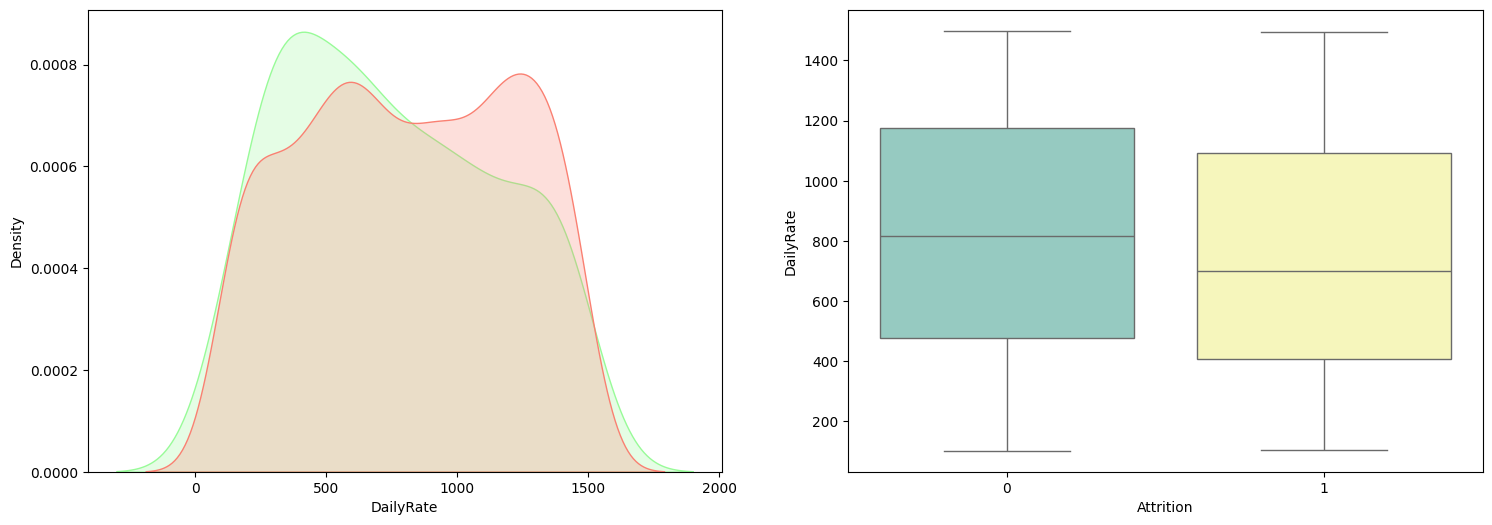

In [52]:
numerical_column_viz("DailyRate")

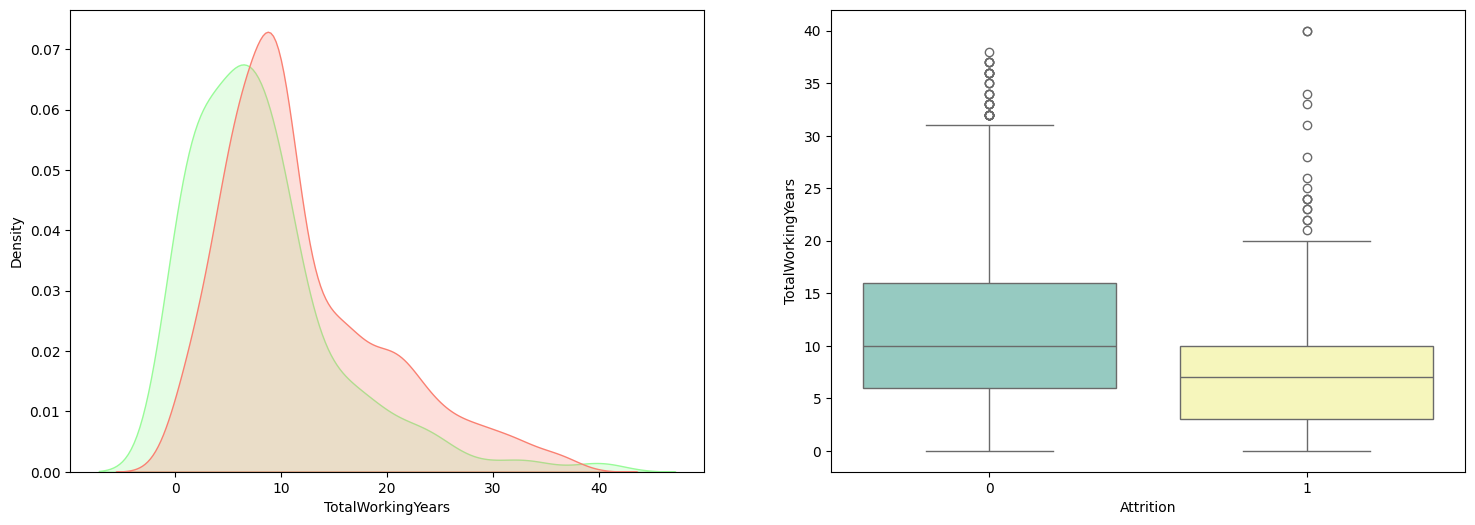

In [53]:
numerical_column_viz("TotalWorkingYears")

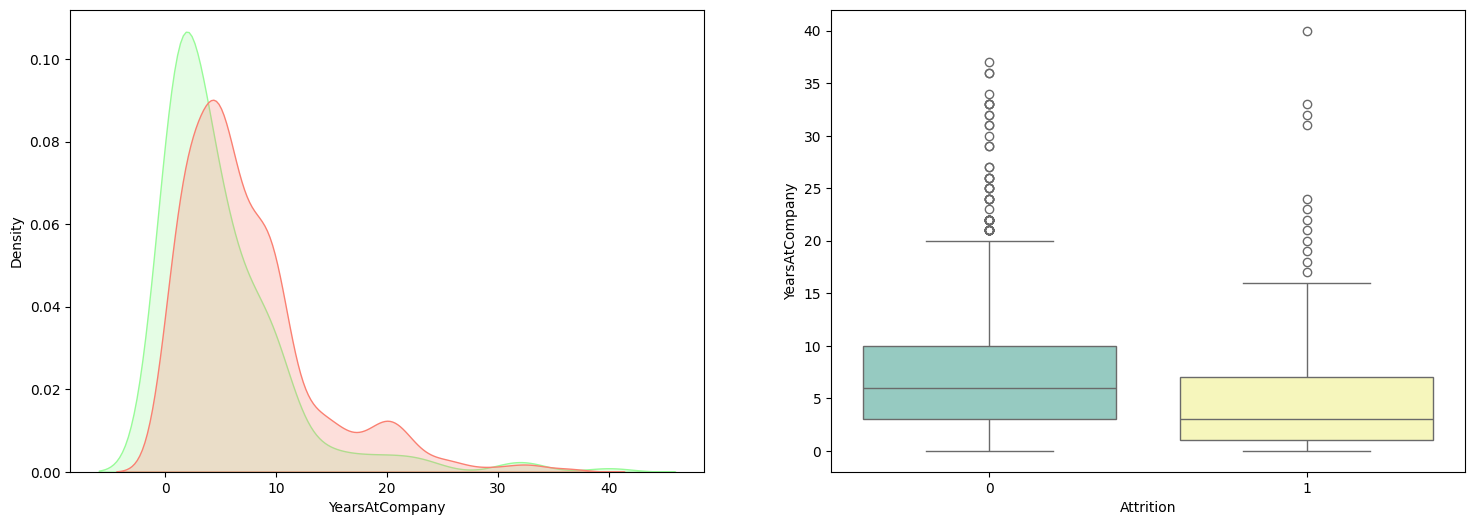

In [54]:
numerical_column_viz("YearsAtCompany")

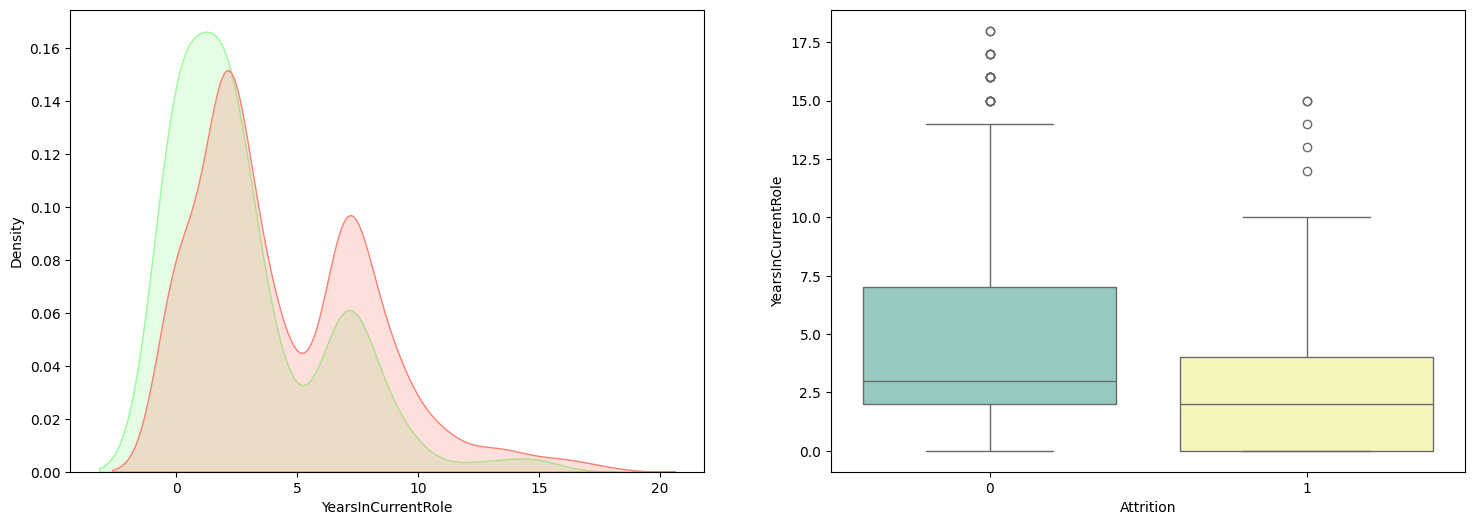

In [55]:
numerical_column_viz("YearsInCurrentRole")

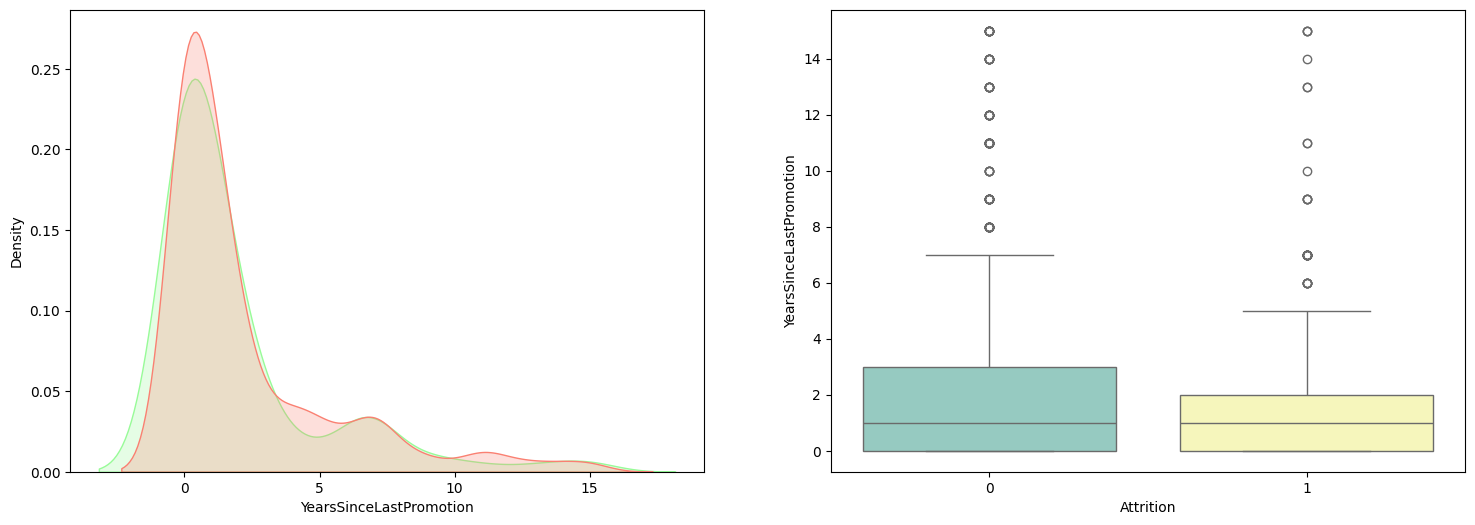

In [56]:
numerical_column_viz("YearsSinceLastPromotion")

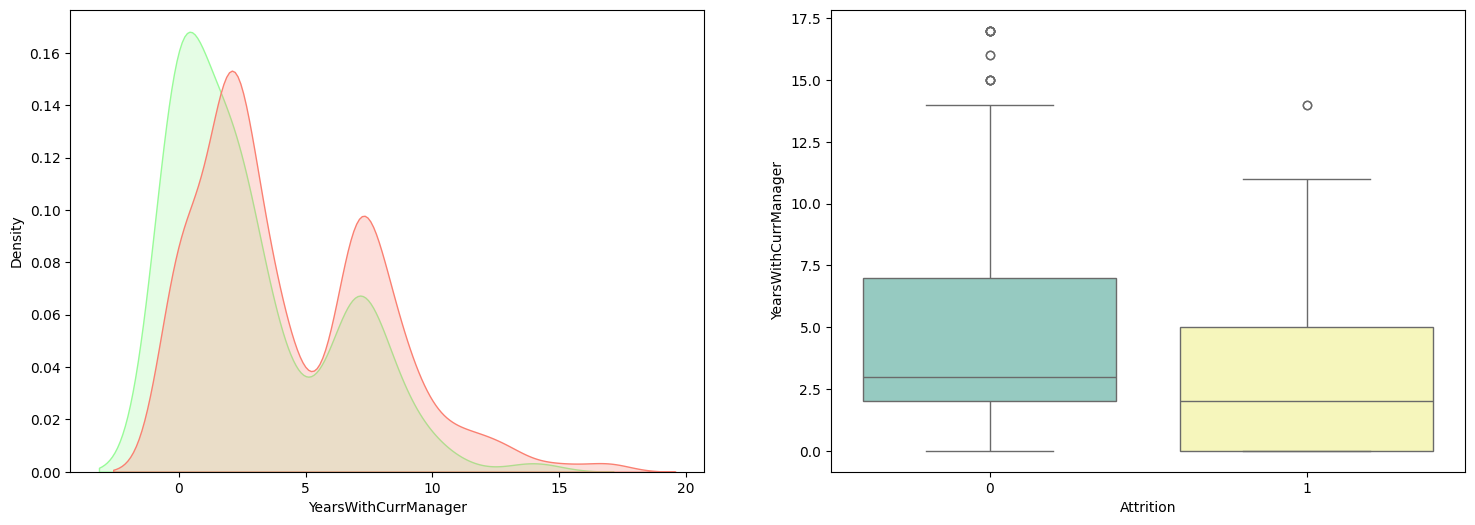

In [57]:
numerical_column_viz("YearsWithCurrManager")

### Visualization of Categorical vs Numericals Features 

In [61]:
def categorical_numerical(numerical_col, categorical_col1, categorical_col2):
    
    f, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    # Plot 1: Numerical vs Categorical 1
    g1 = sns.swarmplot(x=categorical_col1, y=numerical_col, hue='Attrition', data=df, dodge=True, ax=ax[0], palette='Set2')
    ax[0].set_title(f'{numerical_col} vs {categorical_col1} separated by Attrition')
    g1.set_xticklabels(g1.get_xticklabels(), rotation=90) 

    # Plot 2: Numerical vs Categorical 2
    g2 = sns.swarmplot(x=categorical_col2, y=numerical_col, hue='Attrition', data=df, dodge=True, ax=ax[1], palette='Set2')
    ax[1].set_title(f'{numerical_col} vs {categorical_col2} separated by Attrition')
    g2.set_xticklabels(g2.get_xticklabels(), rotation=90) 
    
    plt.tight_layout()
    plt.show()


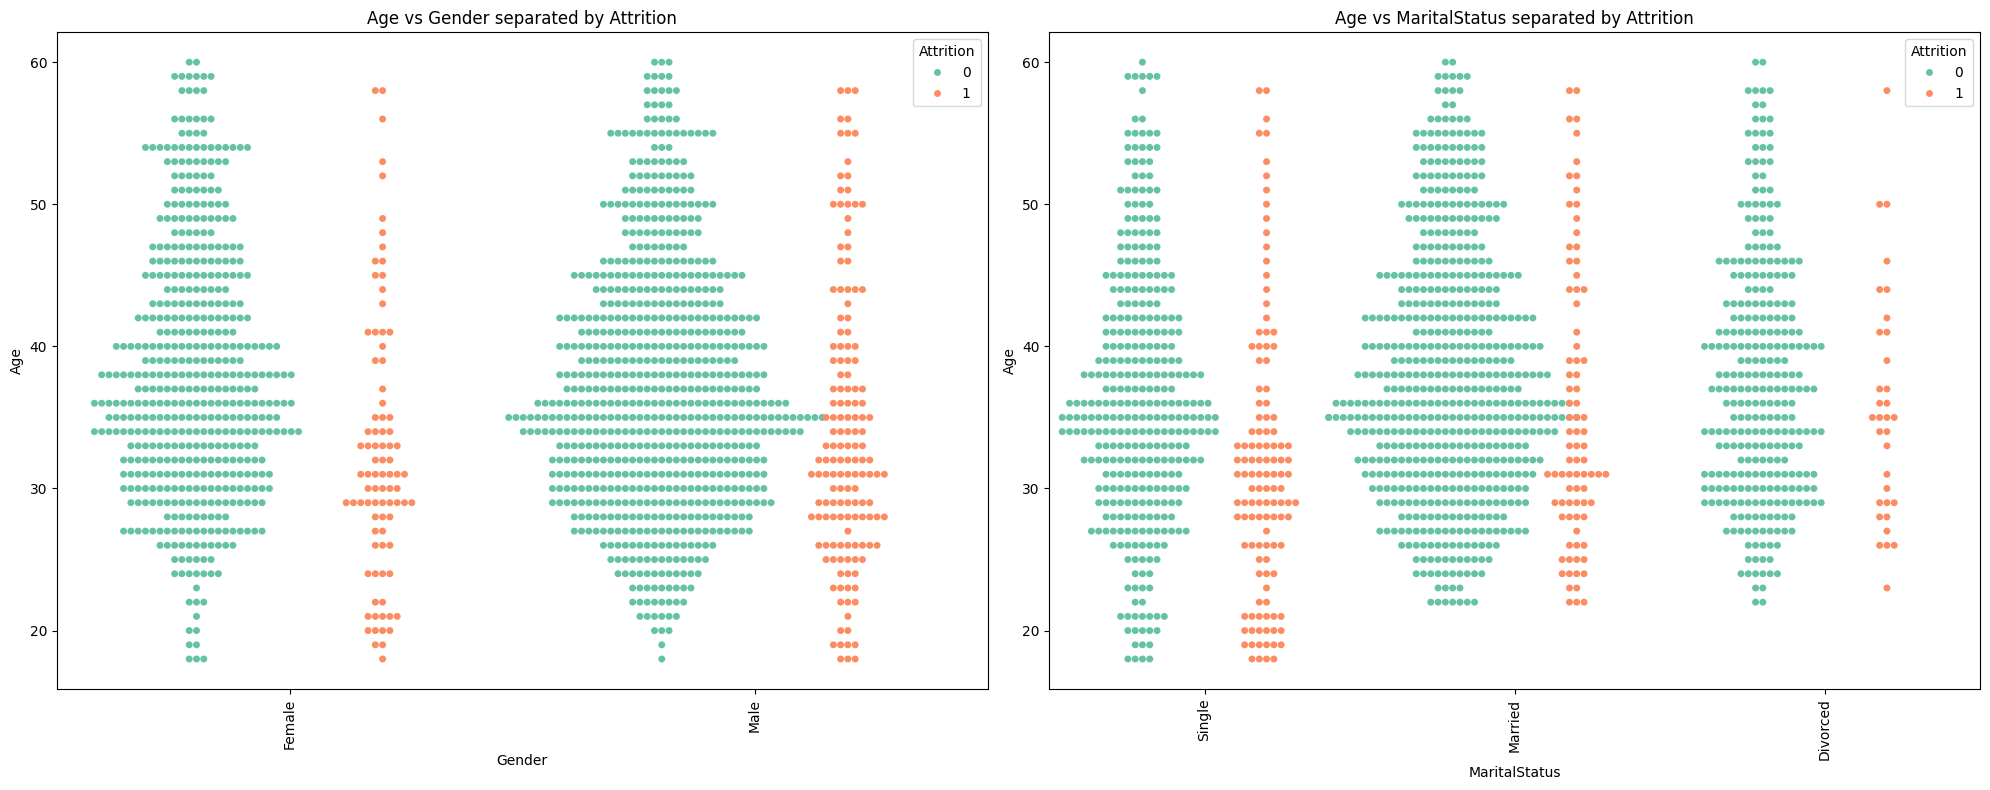

In [62]:
categorical_numerical('Age','Gender','MaritalStatus')

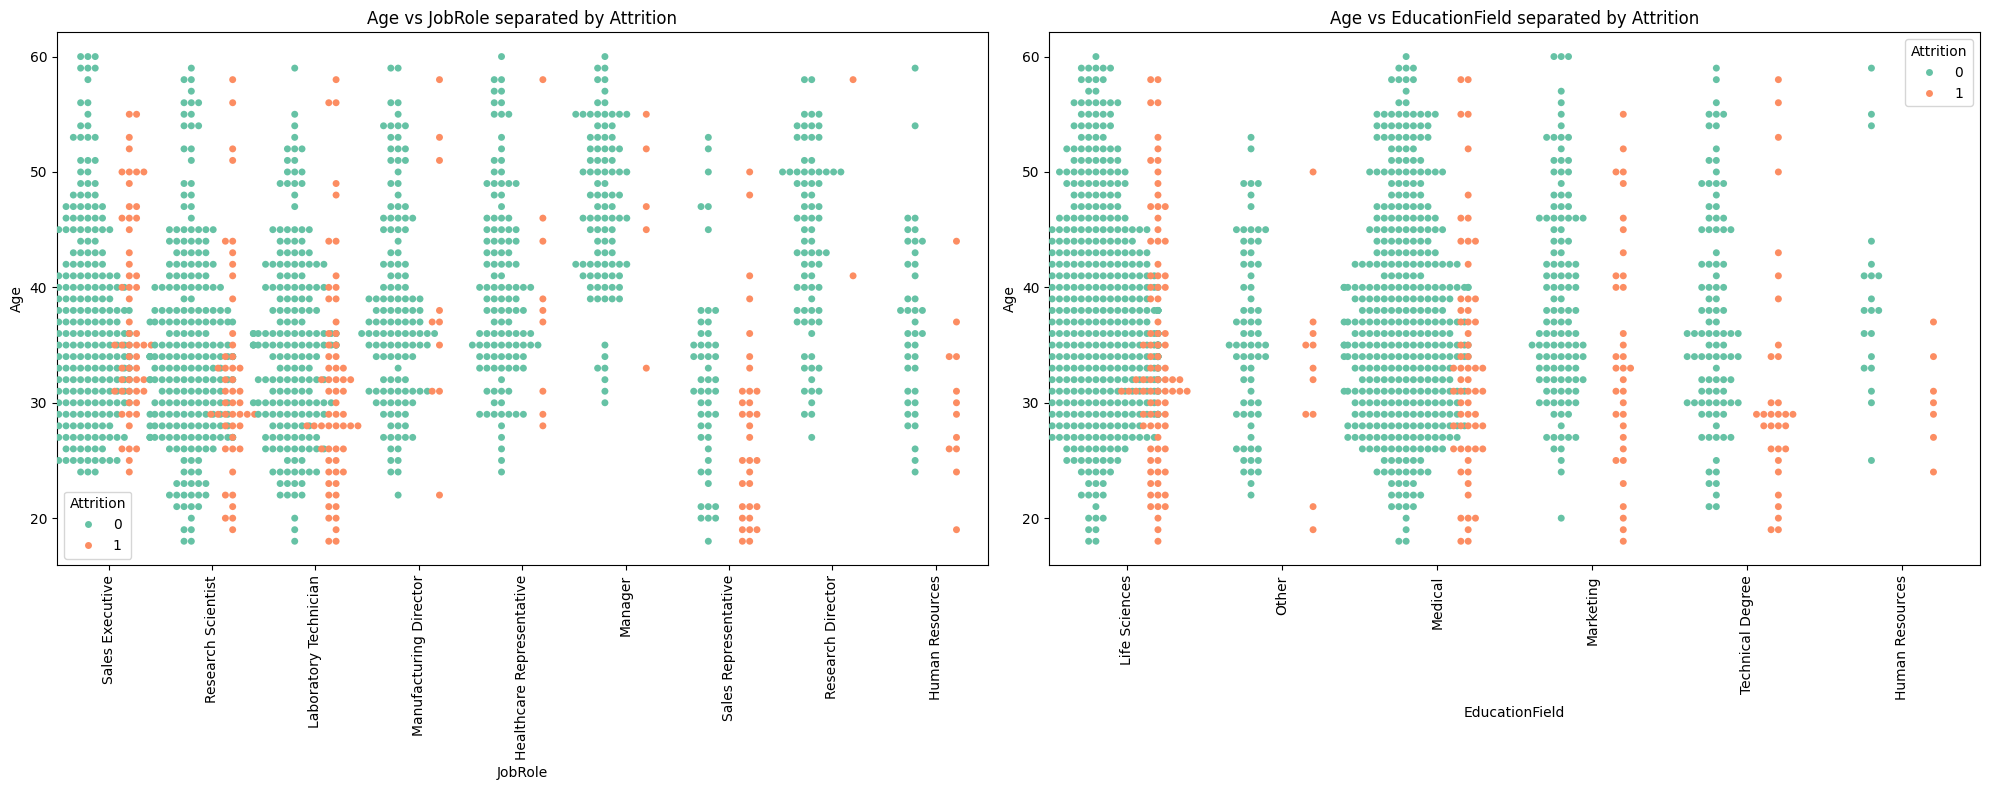

In [63]:
categorical_numerical('Age','JobRole','EducationField')

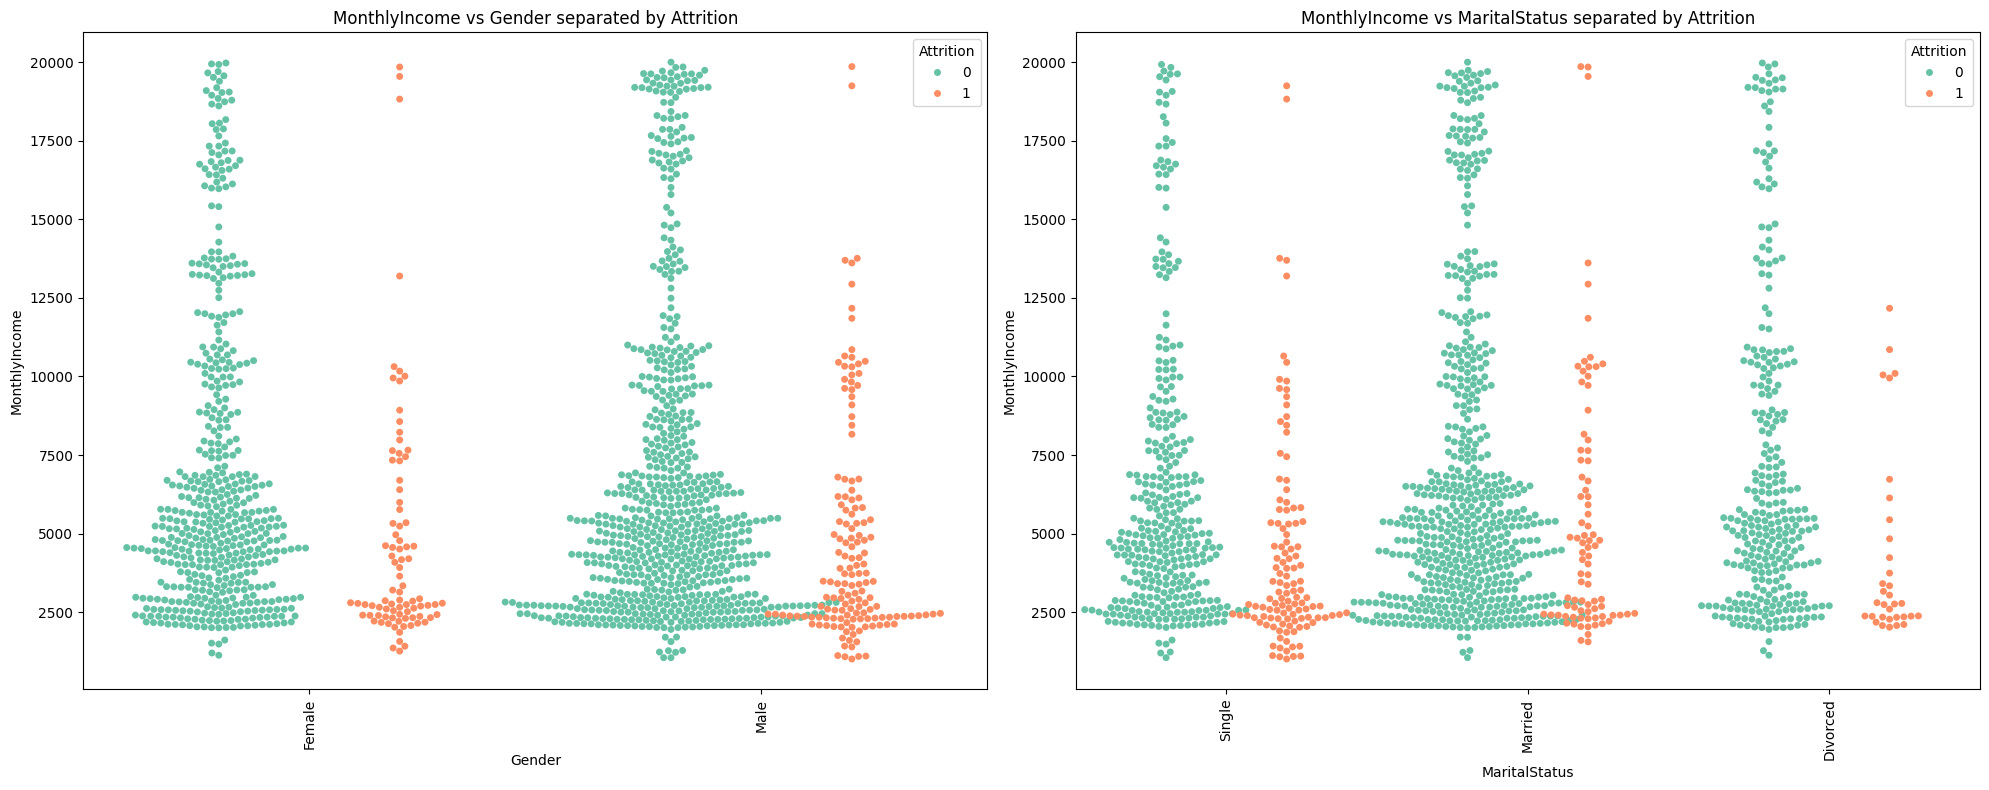

In [64]:
categorical_numerical('MonthlyIncome','Gender','MaritalStatus')

## Feature Engineering

In [65]:

df['Total_Satisfaction'] = (df['EnvironmentSatisfaction'] + 
                            df['JobInvolvement'] + 
                            df['JobSatisfaction'] + 
                            df['RelationshipSatisfaction'] +
                            df['WorkLifeBalance']) /5 

# Drop Columns
df.drop(['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance'], axis=1, inplace=True)

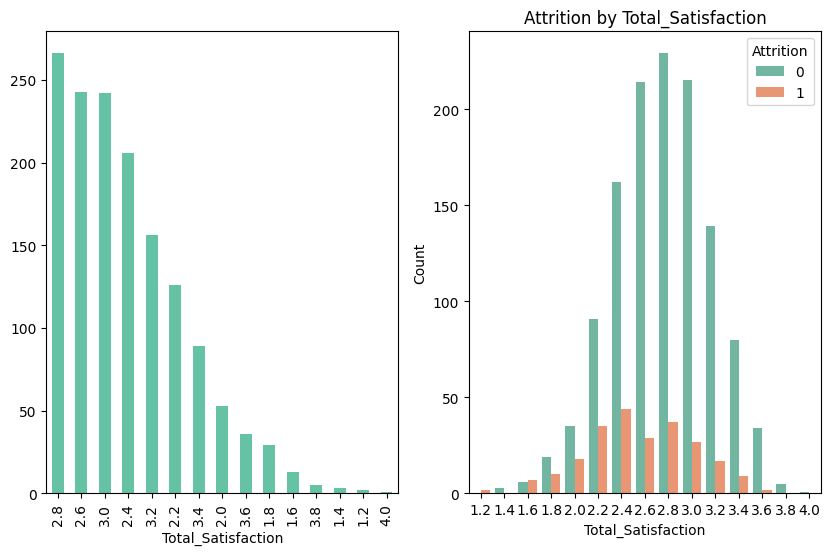

In [66]:
categorical_column_viz('Total_Satisfaction')

In [67]:
df.Total_Satisfaction.describe()

count    1470.000000
mean        2.730748
std         0.428551
min         1.200000
25%         2.400000
50%         2.800000
75%         3.000000
max         4.000000
Name: Total_Satisfaction, dtype: float64

In [68]:
# Convert Total satisfaction into boolean
# median = 2.8
# x = 1 if x >= 2.8

df['Total_Satisfaction_bool'] = df['Total_Satisfaction'].apply(lambda x:1 if x>=2.8 else 0 ) 
df.drop('Total_Satisfaction', axis=1, inplace=True)

In [69]:
# It can be observed that the rate of attrition of employees below age of 35 is high

df['Age_bool'] = df['Age'].apply(lambda x:1 if x<35 else 0)
df.drop('Age', axis=1, inplace=True)

In [70]:
# It can be observed that the employees are more likey the drop the job if dailtRate less than 800

df['DailyRate_bool'] = df['DailyRate'].apply(lambda x:1 if x<800 else 0)
df.drop('DailyRate', axis=1, inplace=True)

In [71]:
# Employees working at R&D Department have higher attrition rate

df['Department_bool'] = df['Department'].apply(lambda x:1 if x=='Research & Development' else 0)
df.drop('Department', axis=1, inplace=True)

In [72]:
# Rate of attrition of employees is high if DistanceFromHome > 10

df['DistanceFromHome_bool'] = df['DistanceFromHome'].apply(lambda x:1 if x>10 else 0)
df.drop('DistanceFromHome', axis=1, inplace=True)

In [73]:
# Employees are more likey to drop the job if the employee is working as Laboratory Technician

df['JobRole_bool'] = df['JobRole'].apply(lambda x:1 if x=='Laboratory Technician' else 0)
df.drop('JobRole', axis=1, inplace=True)

In [74]:
# Employees are more likey to the drop the job if the employee's hourly rate < 65

df['HourlyRate_bool'] = df['HourlyRate'].apply(lambda x:1 if x<65 else 0)
df.drop('HourlyRate', axis=1, inplace=True)

In [75]:
# Employees are more likey to the drop the job if the employee's MonthlyIncome < 4000

df['MonthlyIncome_bool'] = df['MonthlyIncome'].apply(lambda x:1 if x<4000 else 0)
df.drop('MonthlyIncome', axis=1, inplace=True)

In [76]:
# Rate of attrition of employees is high if NumCompaniesWorked < 3

df['NumCompaniesWorked_bool'] = df['NumCompaniesWorked'].apply(lambda x:1 if x>3 else 0)
df.drop('NumCompaniesWorked', axis=1, inplace=True)

In [77]:
# Employees are more likey to the drop the job if the employee's TotalWorkingYears < 8

df['TotalWorkingYears_bool'] = df['TotalWorkingYears'].apply(lambda x:1 if x<8 else 0)
df.drop('TotalWorkingYears', axis=1, inplace=True)

In [78]:
# Employees are more likey to the drop the job if the employee's YearsAtCompany < 3

df['YearsAtCompany_bool'] = df['YearsAtCompany'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsAtCompany', axis=1, inplace=True)

In [79]:
# Employees are more likey to the drop the job if the employee's YearsInCurrentRole < 3

df['YearsInCurrentRole_bool'] = df['YearsInCurrentRole'].apply(lambda x:1 if x<3 else 0)
df.drop('YearsInCurrentRole', axis=1, inplace=True)

In [80]:
# Employees are more likey to the drop the job if the employee's YearsSinceLastPromotion < 1

df['YearsSinceLastPromotion_bool'] = df['YearsSinceLastPromotion'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsSinceLastPromotion', axis=1, inplace=True)

In [81]:
# Employees are more likey to the drop the job if the employee's YearsWithCurrManager < 1

df['YearsWithCurrManager_bool'] = df['YearsWithCurrManager'].apply(lambda x:1 if x<1 else 0)
df.drop('YearsWithCurrManager', axis=1, inplace=True)

In [82]:
df['Gender'] = df['Gender'].apply(lambda x:1 if x=='Female' else 0)

In [83]:
df.drop('MonthlyRate', axis=1, inplace=True)
df.drop('PercentSalaryHike', axis=1, inplace=True)

In [84]:
convert_category = ['BusinessTravel','Education','EducationField','MaritalStatus','StockOptionLevel','OverTime','Gender','TrainingTimesLastYear']
for col in convert_category:
        df[col] = df[col].astype('category')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Attrition                     1470 non-null   int64   
 1   BusinessTravel                1470 non-null   category
 2   Education                     1470 non-null   category
 3   EducationField                1470 non-null   category
 4   Gender                        1470 non-null   category
 5   JobLevel                      1470 non-null   int64   
 6   MaritalStatus                 1470 non-null   category
 7   OverTime                      1470 non-null   category
 8   PerformanceRating             1470 non-null   int64   
 9   StockOptionLevel              1470 non-null   category
 10  TrainingTimesLastYear         1470 non-null   category
 11  Total_Satisfaction_bool       1470 non-null   int64   
 12  Age_bool                      1470 non-null   in

In [86]:
#separate the categorical and numerical data
X_categorical = df.select_dtypes(include=['category'])
X_numerical = df.select_dtypes(include=['int64'])
X_numerical.drop('Attrition', axis=1, inplace=True)

In [87]:
y = df['Attrition']

In [88]:
# One HOt Encoding Categorical Features

onehotencoder = OneHotEncoder()

X_categorical = onehotencoder.fit_transform(X_categorical).toarray()
X_categorical = pd.DataFrame(X_categorical)
X_categorical

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
#concat the categorical and numerical values

X_all = pd.concat([X_categorical, X_numerical], axis=1)
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,1,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,1,1,1,1,1,1,1
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,1,0,0,0,0,0,1
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,1,1,1,0,0


In [90]:
X_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   0                             1470 non-null   float64
 1   1                             1470 non-null   float64
 2   2                             1470 non-null   float64
 3   3                             1470 non-null   float64
 4   4                             1470 non-null   float64
 5   5                             1470 non-null   float64
 6   6                             1470 non-null   float64
 7   7                             1470 non-null   float64
 8   8                             1470 non-null   float64
 9   9                             1470 non-null   float64
 10  10                            1470 non-null   float64
 11  11                            1470 non-null   float64
 12  12                            1470 non-null   float64
 13  13 

### Split Data

In [91]:
X_train,X_test, y_train, y_test = train_test_split(X_all,y, test_size=0.30)

In [92]:
print(f"Train data shape: {X_train.shape}, Test Data Shape {X_test.shape}")

Train data shape: (1029, 48), Test Data Shape (441, 48)


In [93]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,DistanceFromHome_bool,JobRole_bool,HourlyRate_bool,MonthlyIncome_bool,NumCompaniesWorked_bool,TotalWorkingYears_bool,YearsAtCompany_bool,YearsInCurrentRole_bool,YearsSinceLastPromotion_bool,YearsWithCurrManager_bool
1039,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,1,1,1,0,0
449,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,1,1,0,0,0,0,1,0
470,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,0,1,1,0,1,1,1,0,0
1278,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,1,0,1,0,1,0,0


# Predict Data using Logistic Regression

In [96]:
X_train.columns = X_train.columns.astype(str)
model = LogisticRegression().fit(X_train, y_train)

In [106]:
X_test.columns = X_test.columns.astype(str)
predictions = model.predict(X_test)

In [99]:
pred_df = pd.DataFrame(index=X_test.index)

In [100]:
pred_df['Attrition'] = predictions
pred_df.head()

,Attrition
1323,0
1405,0
785,0
486,0
1250,0


In [101]:
# Cross-validation accuracy metric
score = round(metrics.accuracy_score(y_test, predictions) * 100, 2)

In [102]:
print("Accuracy: %s" % score)

Accuracy: 89.12


In [103]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       371
           1       0.76      0.46      0.57        70

    accuracy                           0.89       441
   macro avg       0.83      0.72      0.75       441
weighted avg       0.88      0.89      0.88       441



Feature: 0, Score: -0.76167
Feature: 1, Score: 0.87704
Feature: 2, Score: -0.12002
Feature: 3, Score: -0.11523
Feature: 4, Score: 0.15507
Feature: 5, Score: 0.15566
Feature: 6, Score: -0.09180
Feature: 7, Score: -0.10834
Feature: 8, Score: -0.14114
Feature: 9, Score: -0.21814
Feature: 10, Score: -0.02284
Feature: 11, Score: -0.10389
Feature: 12, Score: -0.23600
Feature: 13, Score: 0.71737
Feature: 14, Score: 0.26800
Feature: 15, Score: -0.27264
Feature: 16, Score: -0.31432
Feature: 17, Score: -0.02655
Feature: 18, Score: 0.33622
Feature: 19, Score: -0.87076
Feature: 20, Score: 0.86611
Feature: 21, Score: 0.61882
Feature: 22, Score: -0.44587
Feature: 23, Score: -0.46351
Feature: 24, Score: 0.28590
Feature: 25, Score: 1.00157
Feature: 26, Score: -0.10563
Feature: 27, Score: 0.12143
Feature: 28, Score: -0.35528
Feature: 29, Score: 0.10585
Feature: 30, Score: -0.24234
Feature: 31, Score: -0.53025
Feature: 32, Score: -0.05226
Feature: 33, Score: -0.15997
Feature: 34, Score: -1.26832
Feature

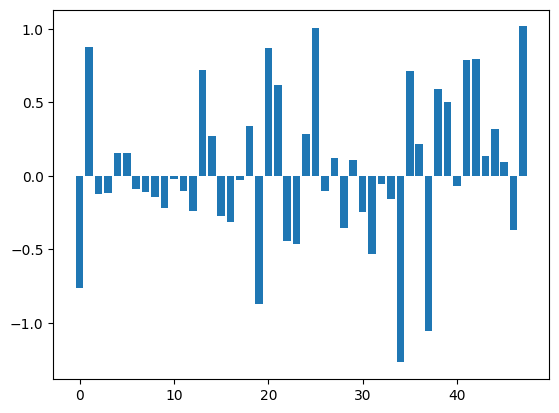

In [104]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()